In [476]:
import numpy as np
import matplotlib.pyplot as plt

# Implementación 1

Si la probabilidad de obtener una carta roja en la siguiente extracción es mayor que el 50%, hago stop.

In [335]:
# 1. creo un mazo de cartas
red_cards = 26 * [1]
black_cards = 26 * [0]
unshuffled_deck = red_cards + black_cards
print(unshuffled_deck)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [336]:
# 2. Revuelvo
#np.random.seed(1)
shuffled_deck = np.random.permutation(unshuffled_deck)
print(shuffled_deck)

[1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0]


In [337]:
remaining_red_cards = 26
for i, card in enumerate(shuffled_deck[:-1]):
    remaining_red_cards -= card
    remaining_total_cards = 52 - i - 1
    remaining_red_proportion = remaining_red_cards/remaining_total_cards

    if remaining_red_proportion > 0.5:
        break

In [338]:
print('Stopped the game at index {}'.format(i))
final_card = shuffled_deck[i+1]
color = 'red' if final_card else 0
print('The next card is {}'.format('red' if final_card else 'black'))
print('We have {}'.format('won' if final_card else 'lost'))

Stopped the game at index 50
The next card is black
We have lost


# Implementación 2

Si la probabilidad de obtener una carta roja en la siguiente extracción es más que X% hago stop.

In [464]:
# 1. creo un mazo de cartas
red_cards = 26 * [1]
black_cards = 26 * [0]
unshuffled_deck = red_cards + black_cards

# 2. Revuelvo
#np.random.seed(1)
shuffled_deck = np.random.permutation(unshuffled_deck)


total_red_cards = 26
total_cards = 52

def execute_strategy(min_fraction_red = 0.5, shuffled_deck=None, return_index=False):
    if shuffled_deck is None:
        shuffled_deck = np.random.permutation(unshuffled_deck)

    remaining_red_cards = total_red_cards

    for i, card in enumerate(shuffled_deck[:-1]):
        remaining_red_cards -= card
        fraction_red_cards = remaining_red_cards/(total_cards -i -1)
        if fraction_red_cards > min_fraction_red:
            break

    #print('Stopped the game at index {}'.format(i))
    #final_card = shuffled_deck[i+1]
    #color = 'red' if final_card else 0
    #print('The next card is {}'.format('red' if final_card else 'black'))
    #print('We have {}'.format('won' if final_card else 'lost'))

    return (i+1, shuffled_deck[i+1]) if return_index else shuffled_deck[i+1]


In [465]:
execute_strategy(min_fraction_red=0.7, return_index=True)


(50, 1)

# Implementación 3. Simulación de resultados del juego

Repito muchas veces y me fijo que pasa.

In [515]:
# Esta es la proporción de veces que gano si juego 1000 veces
observations = np.array([execute_strategy(min_fraction_red=0.75) for _ in range(1000)])
observations.mean()

0.514

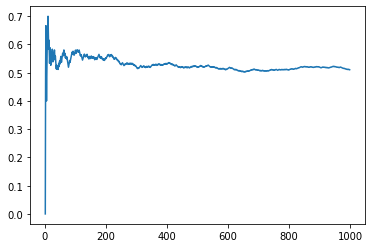

In [517]:
# puedo grafica como se comporta la frecuencia de victorias al aumentar el tamano muestral.
# tiende al verdadero valor de exito.
np.random.seed(0)

res = []
freq = []

for i in range(1,1000):
    res.append(execute_strategy(min_fraction_red=0.5))
    mi_frac = sum(res)/len(res)
    freq.append(mi_frac)

fig, ax = plt.subplots()
plt.plot(list(range(1, len(res) + 1)), freq)
plt.show()

In [518]:
# puedo graficar un histograma estudiando las frecuencias a una cantidad de muestras,
# y así generar una respuesta mediante intervalos de confianza.

multiples_freq = []
n_games = 100
reps = 1000

for i in range(reps):
    freq = np.array([execute_strategy(min_fraction_red=0.5) for _ in range(n_games)]).mean()
    multiples_freq.append(freq)

Interval: 0.3400 - 0.5889 with prob: 0.9500


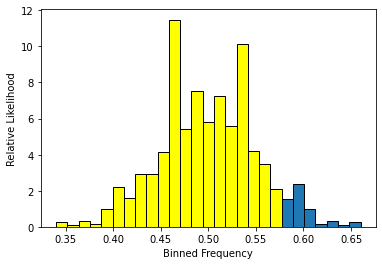

In [519]:
likelihoods, bin_edges, patches = plt.hist(multiples_freq, bins='auto', edgecolor='black', density=True)

bin_width = bin_edges[1] - bin_edges[0]
index = likelihoods.argmax()
k = 10
start_index, end_index = index - k , index + k
area = likelihoods[start_index:end_index+1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index + 1]
range_string = '{:.4f} - {:.4f}'.format(range_start, range_end)
print('Interval: {} with prob: {:.4f}'.format(range_string, area))

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')

plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

plt.show()

# Existe un 95% de probabilidad de gane entre 34 y 58% de las veces. 
# podemos repetir el experimentos con más casos para mejorar los resultados

In [520]:
# puedo graficar un histograma estudiando las frecuencias a una cantidad de muestras,
# y así generar una respuesta mediante intervalos de confianza.

multiples_freq = []
n_games = 500
reps = 10000

for i in range(reps):
    freq = np.array([execute_strategy(min_fraction_red=0.5) for _ in range(n_games)]).mean()
    multiples_freq.append(freq)



Interval: 0.4575 - 0.5482 with prob: 0.9562


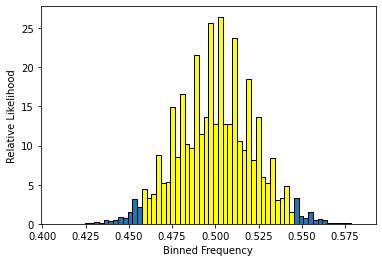

In [521]:
likelihoods, bin_edges, patches = plt.hist(multiples_freq, bins='auto', edgecolor='black', density=True)

bin_width = bin_edges[1] - bin_edges[0]
index = likelihoods.argmax()
k = 16
start_index, end_index = index - k , index + k
area = likelihoods[start_index:end_index+1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index + 1]
range_string = '{:.4f} - {:.4f}'.format(range_start, range_end)
print('Interval: {} with prob: {:.4f}'.format(range_string, area))

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')

plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

plt.show()

# Mejoró. Existe un 95% de probabilidad de gane entre 44 y 54% de las veces. 
# podemos repetir el experimentos con más casos para mejorar los resultados

En general, el estudio de intervalos de confianza para diferentes tamaños muestrales así como para diferente samples de cartas no ofrecen resultados concluyentes respecto a sí el valor probabilidad de ganar el juego es mayor al 50%.

Se simularon (pg.66(94)) las probabilidades de ganar/perder, pero desglosando los casos en que se termina mirando o no la última carta. Se ve aquí que el punto clave es que no necesariamente se dirá stop en el juego, obligando a decidir el resultado en la última carta. 

Bajo esta situación, la probabilidad de victoria siempre, bajo cualquier prob.threshold, bajo cualquier tamaño de deck, es del 50%. 

Con esto, la estrategia óptima es decidir en base a la primera carta del mazo. Existe un 50% de prob. de victoria y 50% de derrota. La hipótesis inicial intuida demostró ser falsa.